# TSNE 시각화

In [1]:
import tensorflow as tf
import random
# import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

learning_rate = 0.001
training_epochs = 5
batch_size = 100

keep_prob = tf.placeholder(tf.float32)


X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])  
Y = tf.placeholder(tf.float32, [None, 10])


W1 = tf.Variable(tf.random_normal([3, 3, 1, 6], stddev=0.01))
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

W2 = tf.Variable(tf.random_normal([3, 3, 6, 12], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

W3 = tf.Variable(tf.random_normal([3, 3, 12, 24], stddev=0.01))
L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3_flat = tf.reshape(L3, [-1, 24 * 4 * 4])

W4 = tf.get_variable("W4", shape=[24 * 4 * 4, 100], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([100]))
L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

W5 = tf.get_variable("W5", shape=[100, 10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L4, W5) + b5

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

l1_list = []
l2_list = []
l3_list = []
l4_list = []
y_list = []

print('Learning start')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ ,l1_val,l2_val,l3_val,l4_val,Y_val= sess.run([cost, optimizer,L1,L2,L3_flat,L4,Y], feed_dict=feed_dict)
        avg_cost += c / total_batch
        
        if(epoch == 4):
            l1_list.append(l1_val)
            l2_list.append(l2_val)
            l3_list.append(l3_val)
            l4_list.append(l4_val)
            y_list.append(Y_val)
            
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
print('Learning Finish')

C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Learning start
Epoch: 0001 cost = 1.244406758
Epoch: 0002 cost = 0.552252284
Epoch: 0003 cost = 0.400562263
E

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)
mnist2 = input_data.read_data_sets("MNIST_data/", one_hot=False)

training_epochs = 1
batch_size = 100

y_nohot = []
x_nohot = []
for epoch in range(training_epochs):
    total_batch = int(mnist2.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist2.train.next_batch(batch_size)
        y_nohot.append(batch_ys)
        x_nohot.append(batch_xs)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
import numpy as np
import matplotlib.pyplot as plt
print(l4_val)
print(l4_val[0].size)

b = l4_val[2]
b = b.reshape(10,10)
plt.imshow(b)
plt.show()

[[0.        0.        2.3735306 ... 0.        2.9232059 4.838234 ]
 [5.8703084 0.        0.4769351 ... 0.        1.8156933 2.4026635]
 [0.        0.        0.        ... 4.443882  0.        0.       ]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 1.0204574 1.0162624 3.3441439]
 [1.4201684 0.        0.        ... 0.        0.        0.       ]]
100


In [4]:
print(l3_val)
print(l3_val[0].size)

[[0.00000000e+00 8.39091688e-02 1.06415339e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.49089669e-02 0.00000000e+00 ... 7.89662898e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.56685359e-03 ... 1.12138905e-05
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.86925650e-03 0.00000000e+00 0.00000000e+00 ... 8.54827613e-02
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 8.71230364e-01 7.18003273e-01 ... 1.14372671e+00
  0.00000000e+00 0.00000000e+00]]
384


In [5]:
import itertools

# layer.
tsne_x_l1 =list(itertools.chain.from_iterable(l1_list))
tsne_x_l2 =list(itertools.chain.from_iterable(l2_list))
tsne_x_l3 =list(itertools.chain.from_iterable(l3_list))
tsne_x_l4 =list(itertools.chain.from_iterable(l4_list))
# y
tsne_y =list(itertools.chain.from_iterable(y_nohot))
y_1d =list(itertools.chain.from_iterable(y_list))
test_x =list(itertools.chain.from_iterable(x_nohot))

print(len(tsne_x_l1))
print(len(tsne_x_l2))
print(len(tsne_x_l3))
print(len(tsne_x_l4))
print('-----------------')
print(len(y_1d))
print(len(tsne_y))
print(len(test_x))

55000
55000
55000
55000
-----------------
55000
55000
55000


In [6]:
print(tsne_x_l4[0])

[0.         0.         0.         0.         0.         0.
 1.1845691  2.0037508  0.         0.         0.         0.
 4.191577   0.         0.         1.9078532  0.         0.
 0.04309274 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 4.176832   0.         0.         0.         0.         0.
 1.7706795  4.5002894  0.         2.1074317  0.         0.
 0.         0.         0.         0.         1.3292347  0.86893976
 0.         0.         2.4410844  3.7334194  0.         7.72199
 7.4919605  3.632453   4.9900694  0.         7.9748645  0.
 0.         0.         0.         2.9716077  0.         0.
 0.         0.         4.9531646  0.         1.3761393  0.
 0.         0.         0.         0.         0.         0.
 7.7051873  0.         0.         1.0919477  0.         0.
 0.02157841 0.         0.         0.         0.         0.
 1.2620215  0.         0.         0.9397266  0.         0.
 3.6307728  0.         0.         0.9918518

In [7]:
# train Y label

y_label = []

for i in y_1d:
    for j in range(10):
        if(i[j] == 1.):
            y_label.append(int(j))
            break

In [8]:
print(y_1d[0])
print(y_label[0])
print('==========================')
print(tsne_y[3])
print(mnist2.train.labels[3])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
9
6
6


In [10]:
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
#data_TSNE = TSNE().fit_transform(tsne_x[0:1000])
data_TSNE = TSNE().fit_transform(tsne_x_l4[0:3000])
data_TSNE.shape[0]

3000

In [11]:
print(len(data_TSNE))

3000


In [15]:
from sklearn.decomposition import PCA

data_PCA = PCA().fit_transform(tsne_x_l4[0:3000])

In [12]:
data_Y = np.array(y_label[0:3000])
data_Y

array([9, 8, 8, ..., 2, 8, 3])

In [13]:
import matplotlib.patheffects

def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txts.append(txt)

    return f, ax, sc, txts

(<matplotlib.figure.Figure at 0x364fd240>,
 [Text(32.8677,29.9836,'0'),
  Text(50.7306,-27.4559,'1'),
  Text(-42.1643,26.4849,'2'),
  Text(-27.3831,10.3559,'3'),
  Text(11.2796,-30.7824,'4'),
  Text(2.68477,30.4116,'5'),
  Text(33.4355,2.07413,'6'),
  Text(-35.1975,-18.8132,'7'),
  Text(-1.36601,9.60895,'8'),
  Text(-9.15584,-27.3275,'9')])

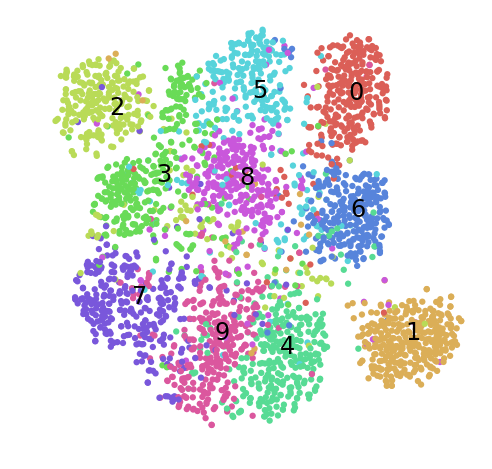

In [14]:
scatter(data_TSNE,data_Y)

ValueError: too many values to unpack (expected 2)

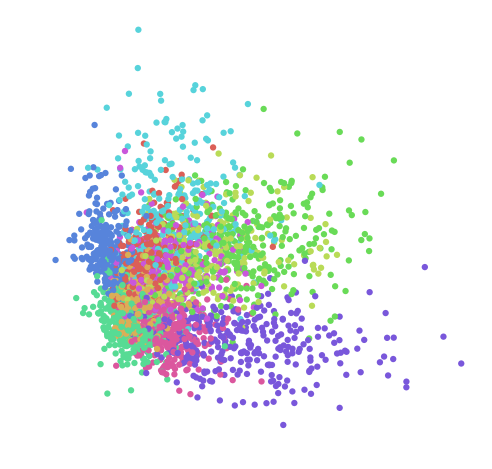

In [16]:
scatter(data_PCA,data_Y)

## 테스트

In [89]:
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE

data_TSNE = TSNE().fit_transform(test_x[0:3000])
b = np.array(tsne_y[0:3000])
data_TSNE.shape[0]

3000

In [29]:
import matplotlib.patheffects

def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txts.append(txt)

    return f, ax, sc, txts

(<matplotlib.figure.Figure at 0x3600b400>,
 [Text(-54.8057,27.632,'0'),
  Text(39.5012,26.3066,'1'),
  Text(2.71177,46.9937,'2'),
  Text(-20.3822,14.619,'3'),
  Text(9.7222,-37.6622,'4'),
  Text(-10.5391,-4.5956,'5'),
  Text(-48.8132,-19.6179,'6'),
  Text(33.7583,-40.9834,'7'),
  Text(9.80016,13.3516,'8'),
  Text(11.9875,-33.5598,'9')])

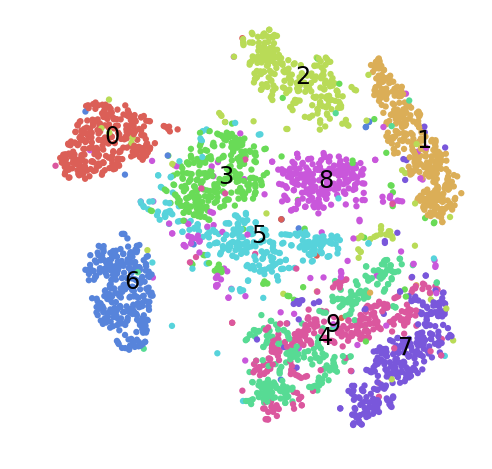

In [90]:
scatter(data_TSNE, b)